In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from feature_engineering import calculate_bollinger_bands, calculate_daily_return, calculate_macd, calculate_sma, average_true_range

In [2]:
def read_dataframe(filename):
    df = pd.read_csv(filename, index_col='Datetime')
    return df

In [3]:
train_data = read_dataframe('Data/EURUSD=X_5m.csv' )
test_data  = read_dataframe('Data/AAPL_5m.csv')

# Defines Dependent and Independent Variables
y_train = train_data[['Adj Close']]
y_test = test_data[['Adj Close']]
y_test

,Adj Close
Datetime,
2023-03-10 09:30:00-05:00,149.895004
2023-03-10 09:35:00-05:00,149.660004
2023-03-10 09:40:00-05:00,149.190002
2023-03-10 09:45:00-05:00,149.080002
2023-03-10 09:50:00-05:00,149.330002
...,...
2023-06-05 11:05:00-04:00,184.240005
2023-06-05 11:10:00-04:00,184.009995
2023-06-05 11:15:00-04:00,184.000000


### Feature Engineering

In [4]:
# FEATURE ENGINEERING ON TRAIN AND TEST DATA
#Feature Engineering on train_set
atr_data = average_true_range(train_data)
macd_data = calculate_macd(train_data)
dr_data = calculate_daily_return(train_data)
bb_data = calculate_bollinger_bands(train_data)
sma_data = calculate_sma(train_data)
train_sets = sma_data


#Feature Engineering on train_set
atr_data = average_true_range(test_data)
macd_data = calculate_macd(test_data)
dr_data = calculate_daily_return(test_data)
bb_data = calculate_bollinger_bands(test_data)
sma_data = calculate_sma(test_data)
test_sets = sma_data

test_sets.head(2)


,Open,Volume,ATR,MACD_Line,Signal_Line,MACD_Histogram,Daily Return,Upper Band,Lower Band,Simple Moving Avg
Datetime,,,,,,,,,,
2023-03-10 09:30:00-05:00,150.250000,3440967,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,149.895004
2023-03-10 09:35:00-05:00,149.884995,1116964,NaN,-0.018746,-0.003749,-0.014997,-0.156777,150.109845,149.445163,149.777504


In [5]:
# DATA PREPROCESSING
train_dataset = pd.merge(train_sets, y_train, on='Datetime')
train_dataset = train_dataset.dropna()

test_dataset = pd.merge(test_sets, y_test, on='Datetime')
test_dataset = test_dataset.dropna()

print(test_dataset.isna().sum())
print(train_dataset.isna().sum())

train_dataset.head(2)

Open                 0
Volume               0
ATR                  0
MACD_Line            0
Signal_Line          0
MACD_Histogram       0
Daily Return         0
Upper Band           0
Lower Band           0
Simple Moving Avg    0
Adj Close            0
dtype: int64
Open                 0
Volume               0
ATR                  0
MACD_Line            0
Signal_Line          0
MACD_Histogram       0
Daily Return         0
Upper Band           0
Lower Band           0
Simple Moving Avg    0
Adj Close            0
dtype: int64


,Open,Volume,ATR,MACD_Line,Signal_Line,MACD_Histogram,Daily Return,Upper Band,Lower Band,Simple Moving Avg,Adj Close
Datetime,,,,,,,,,,,
2023-03-14 01:05:00+00:00,1.072041,0,0.000312,0.000025,1.259803e-05,0.000013,-0.010718,1.072446,1.071603,1.072025,1.072041
2023-03-14 01:10:00+00:00,1.071811,0,0.000328,-0.000053,-4.610510e-07,-0.000052,-0.085690,1.072583,1.071347,1.071965,1.071123


In [22]:
x_train = train_dataset.drop(['Open', 'Adj Close', 'Volume'], axis=1)
y_train = train_dataset[['Adj Close']]

x_test = test_dataset.drop(['Open', 'Adj Close'], axis=1)
y_test = test_dataset[['Adj Close']]

# Dropping The Last Row of the x_train and the first row of the y_train  
x_train = x_train.drop(x_train.index[-1])
y_train = y_train.drop(y_train.index[0])

# Dropping The Last Row of the x_test and the first row of the y_test
x_test = x_test.drop(x_test.index[-1])
y_test = y_test.drop(y_test.index[0])

x_train

,ATR,MACD_Line,Signal_Line,MACD_Histogram,Daily Return,Upper Band,Lower Band,Simple Moving Avg
Datetime,,,,,,,,
2023-03-14 01:05:00+00:00,0.000312,0.000025,1.259803e-05,1.252324e-05,-0.010718,1.072446,1.071603,1.072025
2023-03-14 01:10:00+00:00,0.000328,-0.000053,-4.610510e-07,-5.223634e-05,-0.085690,1.072583,1.071347,1.071965
2023-03-14 01:15:00+00:00,0.000312,-0.000095,-1.931893e-05,-7.543152e-05,0.021435,1.072597,1.071255,1.071926
2023-03-14 01:20:00+00:00,0.000312,-0.000108,-3.711760e-05,-7.119469e-05,0.021419,1.072577,1.071235,1.071906
2023-03-14 01:25:00+00:00,0.000295,-0.000127,-5.506629e-05,-7.179477e-05,-0.010713,1.072565,1.071199,1.071882
...,...,...,...,...,...,...,...,...
2023-06-05 16:00:00+01:00,0.000598,0.000711,7.113133e-04,1.258853e-07,0.010704,1.073636,1.067730,1.070683
2023-06-05 16:05:00+01:00,0.000590,0.000662,7.014408e-04,-3.949016e-05,-0.010703,1.073630,1.067999,1.070815
2023-06-05 16:10:00+01:00,0.000394,0.000625,6.861090e-04,-6.132692e-05,0.010704,1.073585,1.068330,1.070958


### MODEL ARCH

In [23]:

model = LinearRegression()
degree = 1
alpha = 0.1  # Regularization strength
model1 = make_pipeline(PolynomialFeatures(degree=degree), StandardScaler(), Ridge(alpha=alpha))
model1.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1))])

In [24]:
# MAKE PREDICTIONS AND CHECK THE VARIANCE AND BIAS VALUES
train_pred = model1.predict(x_train)
test_pred = model1.predict(x_test)


test_variance = np.var(test_pred)
print('Variance value:', test_variance)

SSE = np.mean((np.mean(test_pred) - y_test)**2)
Bias = SSE - test_variance
print('Bias value:', Bias)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Volume


In [25]:
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print('train mse:', train_mse)
print('train r2:', train_r2)
print('test mse:', test_mse)
print('test r2:', test_r2)

train mse: 1.2641066275640598e-07
train r2: 0.9991575185439143
test mse: 0.09582364946242238
test r2: 0.9982950463456911


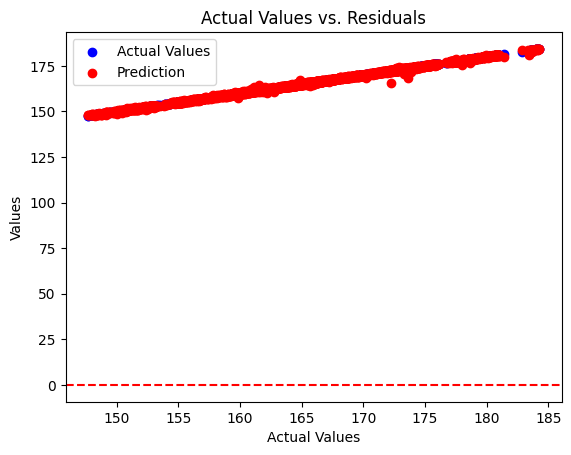

In [26]:
# Plot the residuals against the actual values
plt.scatter(y_test, y_test, color='blue', label='Actual Values')
plt.scatter(y_test, test_pred, color='red', label='Prediction')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Values")
plt.title("Actual Values vs. Residuals")
plt.legend()
plt.show()

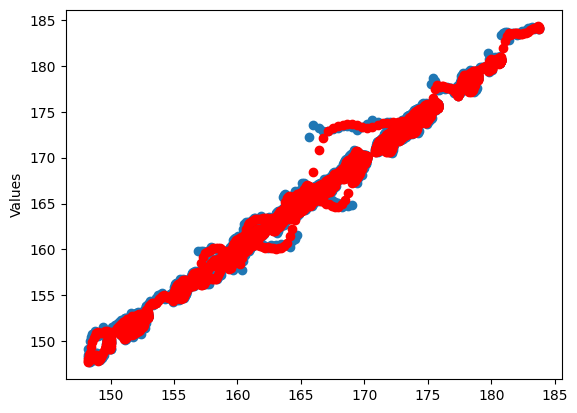

In [27]:
plt.scatter(x_test['Simple Moving Avg'], y_test)
plt.scatter(x_test['Simple Moving Avg'], test_pred, color='r')
plt.xlabel('')
plt.ylabel('Values')
plt.show()

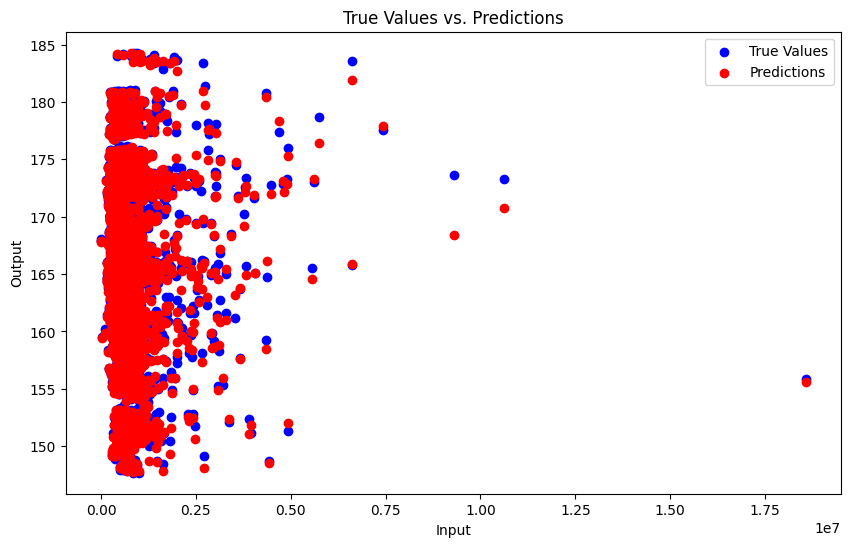

In [28]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(x_test.iloc[:,0], y_test, color='blue', label='True Values')
plt.scatter(x_test.iloc[:,0], test_pred, color='red', label='Predictions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('True Values vs. Predictions')
plt.legend()
plt.show()

## MODEL EVALUATION 

In [29]:
valid_data = pd.read_csv('Data/SPY_5m.csv', index_col='Datetime')
print(valid_data.columns)

v_data = valid_data.drop(['Volume'], axis=1)
v_data

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


,Open,High,Low,Close,Adj Close
Datetime,,,,,
2023-03-13 09:30:00-04:00,381.809998,382.700012,381.250000,381.709991,381.709991
2023-03-13 09:35:00-04:00,381.700012,381.829987,380.649994,381.570007,381.570007
2023-03-13 09:40:00-04:00,381.589996,382.010010,380.679993,381.339996,381.339996
2023-03-13 09:45:00-04:00,381.359985,384.149994,381.089996,384.130707,384.130707
2023-03-13 09:50:00-04:00,384.130707,385.369995,383.809998,384.809998,384.809998
...,...,...,...,...,...
2023-06-06 13:30:00-04:00,427.230011,427.350006,427.010010,427.190002,427.190002
2023-06-06 13:35:00-04:00,427.190002,427.339996,427.130005,427.214996,427.214996
2023-06-06 13:40:00-04:00,427.209991,427.274994,427.010010,427.059998,427.059998


In [30]:
# Defines Target Variable
y_valid = valid_data[['Adj Close']]
y_valid

,Adj Close
Datetime,
2023-03-13 09:30:00-04:00,381.709991
2023-03-13 09:35:00-04:00,381.570007
2023-03-13 09:40:00-04:00,381.339996
2023-03-13 09:45:00-04:00,384.130707
2023-03-13 09:50:00-04:00,384.809998
...,...
2023-06-06 13:30:00-04:00,427.190002
2023-06-06 13:35:00-04:00,427.214996
2023-06-06 13:40:00-04:00,427.059998


In [31]:
#Feature Engineering on v_set

atr_data = average_true_range(v_data)
macd_data = calculate_macd(v_data)
dr_data = calculate_daily_return(v_data)
bb_data = calculate_bollinger_bands(v_data)
sma_data = calculate_sma(v_data)
valid_set = sma_data
#v_set = v_set.dropna()
valid_set

,Open,ATR,MACD_Line,Signal_Line,MACD_Histogram,Daily Return,Upper Band,Lower Band,Simple Moving Avg
Datetime,,,,,,,,,
2023-03-13 09:30:00-04:00,381.809998,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,381.709991
2023-03-13 09:35:00-04:00,381.700012,NaN,-0.011167,-0.002233,-0.008933,-0.036673,381.837967,381.442032,381.639999
2023-03-13 09:40:00-04:00,381.589996,NaN,-0.038137,-0.009414,-0.028723,-0.060280,381.913627,381.166370,381.539998
2023-03-13 09:45:00-04:00,381.359985,NaN,0.163788,0.025226,0.138562,0.731817,384.796283,379.579068,382.187675
2023-03-13 09:50:00-04:00,384.130707,NaN,0.374313,0.095044,0.279269,0.176838,385.968654,379.455626,382.712140
...,...,...,...,...,...,...,...,...,...
2023-06-06 13:30:00-04:00,427.230011,0.395347,-0.108419,-0.087015,-0.021404,-0.009365,428.231598,426.759939,427.495769
2023-06-06 13:35:00-04:00,427.190002,0.386060,-0.110929,-0.091798,-0.019131,0.005851,428.126316,426.771721,427.449019
2023-06-06 13:40:00-04:00,427.209991,0.392131,-0.123995,-0.098237,-0.025758,-0.036281,427.976724,426.803314,427.390019


In [32]:
# DATA PREPROCESSING
v_set = pd.merge(valid_set, y_valid, on='Datetime')
v_set = v_set.dropna()

print(v_set.isna().sum())

v_set

Open                 0
ATR                  0
MACD_Line            0
Signal_Line          0
MACD_Histogram       0
Daily Return         0
Upper Band           0
Lower Band           0
Simple Moving Avg    0
Adj Close            0
dtype: int64


,Open,ATR,MACD_Line,Signal_Line,MACD_Histogram,Daily Return,Upper Band,Lower Band,Simple Moving Avg,Adj Close
Datetime,,,,,,,,,,
2023-03-13 10:35:00-04:00,385.983490,1.712145,0.942934,0.791123,0.151811,-0.091146,387.697110,380.981818,384.339464,385.630005
2023-03-13 10:40:00-04:00,385.660004,1.715003,0.972375,0.827373,0.145002,0.051858,387.764634,381.113031,384.438833,385.829987
2023-03-13 10:45:00-04:00,386.269989,1.712147,1.011485,0.864196,0.147289,0.088129,387.874614,381.219449,384.547031,386.170013
2023-03-13 10:50:00-04:00,386.170013,1.762153,0.965186,0.884394,0.080792,-0.212344,387.839641,381.348889,384.594265,385.350006
2023-03-13 10:55:00-04:00,385.440002,1.722868,1.105377,0.928590,0.176787,0.609837,388.239038,381.294575,384.766807,387.700012
...,...,...,...,...,...,...,...,...,...,...
2023-06-06 13:30:00-04:00,427.230011,0.395347,-0.108419,-0.087015,-0.021404,-0.009365,428.231598,426.759939,427.495769,427.190002
2023-06-06 13:35:00-04:00,427.190002,0.386060,-0.110929,-0.091798,-0.019131,0.005851,428.126316,426.771721,427.449019,427.214996
2023-06-06 13:40:00-04:00,427.209991,0.392131,-0.123995,-0.098237,-0.025758,-0.036281,427.976724,426.803314,427.390019,427.059998


In [33]:
x_valid = v_set.drop(['Adj Close', 'Open'], axis=1)
y_valid = v_set[['Adj Close']]

# Dropping The Last Row of the x_valid and the first row of the y_valid  
x_valid = x_valid.drop(x_valid.index[-1])
y_valid = y_valid.drop(y_valid.index[0])

x_valid.head(3)

,ATR,MACD_Line,Signal_Line,MACD_Histogram,Daily Return,Upper Band,Lower Band,Simple Moving Avg
Datetime,,,,,,,,
2023-03-13 10:35:00-04:00,1.712145,0.942934,0.791123,0.151811,-0.091146,387.697110,380.981818,384.339464
2023-03-13 10:40:00-04:00,1.715003,0.972375,0.827373,0.145002,0.051858,387.764634,381.113031,384.438833
2023-03-13 10:45:00-04:00,1.712147,1.011485,0.864196,0.147289,0.088129,387.874614,381.219449,384.547031


In [34]:
valid_pred = model1.predict(x_valid)

In [35]:
valid_mse = mean_squared_error(y_valid, valid_pred)
valid_r2 = r2_score(y_valid, valid_pred)

print('Validation MSE score:', valid_mse)
print("Validation R2 score:", valid_r2)

Validation MSE score: 0.2427165529762415
Validation R2 score: 0.9972890690137888


In [37]:
import joblib
joblib.dump(model1, "./Models/Linear_Reg.pkl")

['./Models/Linear_Reg.pkl']